<a href="https://colab.research.google.com/github/atharbilal/house-price-prediction-model-using-XGBRegressor/blob/main/Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn import metrics as met
!pip install scikit-learn==1.2.2

# Load dataset
data = fetch_california_housing(as_frame=True)
housing = data.frame
# Add target column as 'price'
housing['price'] = data.target

print(housing.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  price  
0    -122.23        4.526  4.526  
1    -122.22        3.585  3.585  
2    -122.24        3.521  3.521  
3    -122.25        3.413  3.413  
4    -122.25        3.422  3.422  


In [ ]:
housing.shape

(20640, 10)

In [ ]:
housing.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0
price,0


In [ ]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,5.000010


In [ ]:
correlation=housing.corr()

<Axes: >

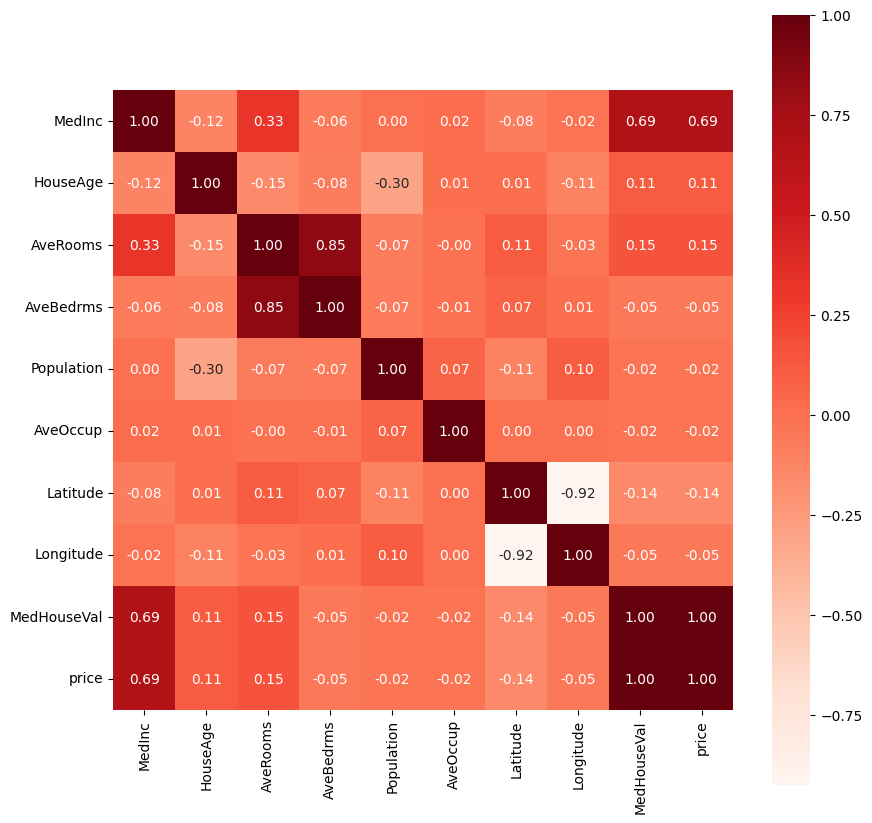

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':10},cmap='Reds')


In [ ]:
X=housing.drop(['price'],axis=1)
Y=housing['price']

In [ ]:
print(pd.DataFrame(X).head().describe())

         MedInc   HouseAge  AveRooms  AveBedrms   Population  AveOccup  \
count  5.000000   5.000000  5.000000   5.000000     5.000000  5.000000   
mean   6.674660  43.600000  6.721921   1.044655   868.400000  2.439414   
std    1.921878  13.501852  0.970532   0.046619   862.336535  0.288132   
min    3.846200  21.000000  5.817352   0.971880   322.000000  2.109842   
25%    5.643100  41.000000  6.238137   1.023810   496.000000  2.181467   
50%    7.257400  52.000000  6.281853   1.073059   558.000000  2.547945   
75%    8.301400  52.000000  6.984127   1.073446   565.000000  2.555556   
max    8.325200  52.000000  8.288136   1.081081  2401.000000  2.802260   

        Latitude   Longitude  MedHouseVal  
count   5.000000    5.000000     5.000000  
mean   37.858000 -122.238000     3.693400  
std     0.013038    0.013038     0.470897  
min    37.850000 -122.250000     3.413000  
25%    37.850000 -122.250000     3.422000  
50%    37.850000 -122.240000     3.521000  
75%    37.860000 -122.230

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)
model=XGBRegressor()
model.fit(X_train,Y_train)

(20640, 9) (16512, 9) (4128, 9)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
training_data=model.predict(X_train)

In [ ]:
print(pd.DataFrame(training_data))

              0
0      0.721732
1      2.735543
2      0.578631
3      2.004312
4      1.181658
...         ...
16507  0.939447
16508  1.033159
16509  1.922244
16510  1.535283
16511  0.809610

[16512 rows x 1 columns]


In [ ]:
testing_data=model.predict(X_test)

In [ ]:
print(pd.DataFrame(testing_data))

             0
0     2.779273
1     2.066204
2     0.961314
3     3.557847
4     3.929222
...        ...
4123  1.463256
4124  0.565591
4125  1.763186
4126  0.779907
4127  2.361181

[4128 rows x 1 columns]


In [ ]:
score1=met.r2_score(Y_test,testing_data)
score2=met.mean_absolute_error(Y_test,testing_data)
print("R squared error is: ",score1)
print("Mean absolute error is: ",score2)

R squared error is:  0.999929603126291
Mean absolute error is:  0.0051191317554730815


GRAPHS BETWEEN ACTUALMAND PREDICTIED PRICES

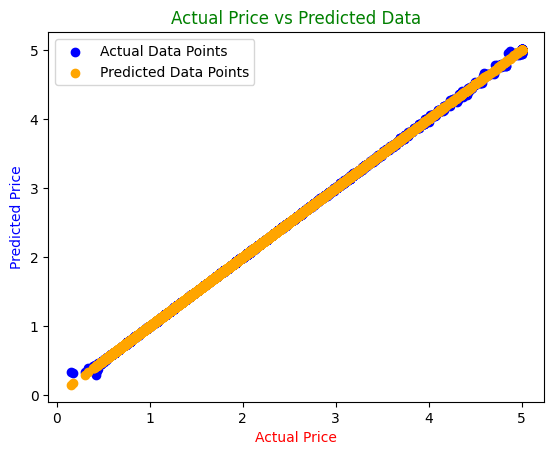

In [ ]:
plt.scatter(Y_test, testing_data, color='blue', label='Actual Data Points')
plt.scatter(Y_test, Y_test, color='orange', label='Predicted Data Points')
plt.xlabel('Actual Price', color='red')
plt.ylabel('Predicted Price', color='blue')
plt.title('Actual Price vs Predicted Data', color='green')
plt.legend()
plt.show()